# **Diwali Sales – Customer Behavior & Purchasing Trends Analysis**

In [ ]:
#Importing usefull library for the projects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loding the data
from google.colab import files
uploaded = files.upload()

Saving Diwali_Sales_Data.csv to Diwali_Sales_Data.csv


In [ ]:
df=pd.read_csv('Diwali_Sales_Data.csv', encoding='latin1')

In [ ]:
df.shape

(11251, 15)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.describe(include='all')

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251,11251,11251,11251,11251.000000,11251.000000,11251,11251,11251,11251,11251.000000,11239.000000,0.0,0.0
unique,NaN,1250,2351,2,7,NaN,NaN,16,5,15,18,NaN,NaN,NaN,NaN
top,NaN,Vishakha,P00265242,F,26-35,NaN,NaN,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,NaN,NaN,NaN,NaN
freq,NaN,42,53,7842,4543,NaN,NaN,1946,4296,1588,2655,NaN,NaN,NaN,NaN
mean,1.003004e+06,NaN,NaN,NaN,NaN,35.421207,0.420318,NaN,NaN,NaN,NaN,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,NaN,NaN,NaN,NaN,12.754122,0.493632,NaN,NaN,NaN,NaN,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,NaN,NaN,NaN,NaN,27.000000,0.000000,NaN,NaN,NaN,NaN,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,NaN,NaN,NaN,NaN,33.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,NaN,NaN,NaN,NaN,43.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,12675.000000,NaN,NaN


we need to drop Age,status,unamed1
Need to fill nulkl values for amount by mean.

In [ ]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
df.drop(['Status','unnamed1','Age'],axis=1,inplace=True)

In [ ]:
df['Amount'].fillna(df['Amount'].mean(),inplace=True)

/tmp/ipython-input-2049983670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].mean(),inplace=True)


In [ ]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Marital_Status,0
State,0
Zone,0
Occupation,0
Product_Category,0


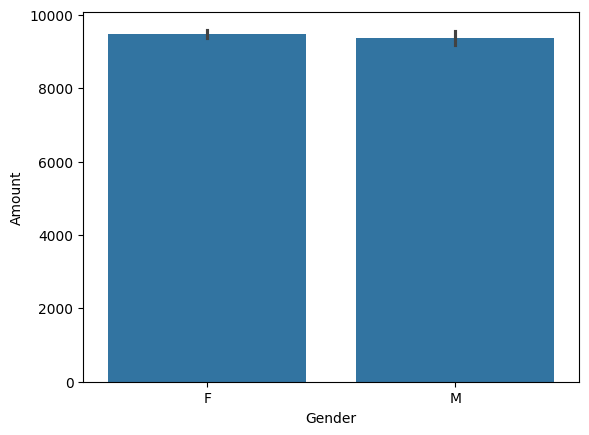

In [ ]:
#visualization
sns.barplot(data=df, x='Gender', y='Amount')
plt.show()

# **Gender-based Insights shows**

Female customers contributed more to total sales revenue, indicating stronger purchase activity among women during Diwali season.

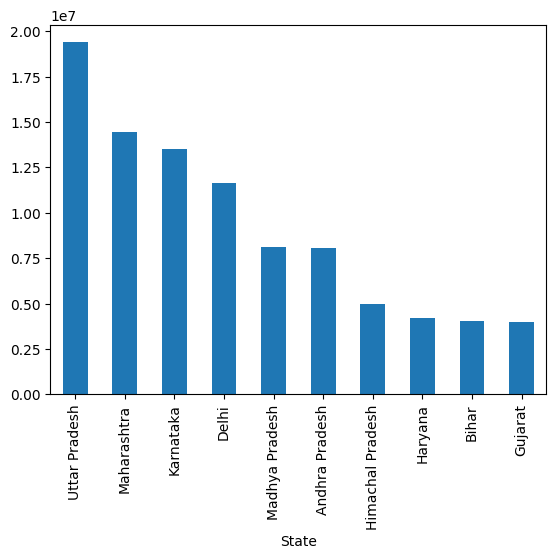

In [ ]:
df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

# **State-wise Performance**


States such as Uttar Pradesh, Maharashtra, Karnataka showed the highest sales, highlighting key geographic markets.

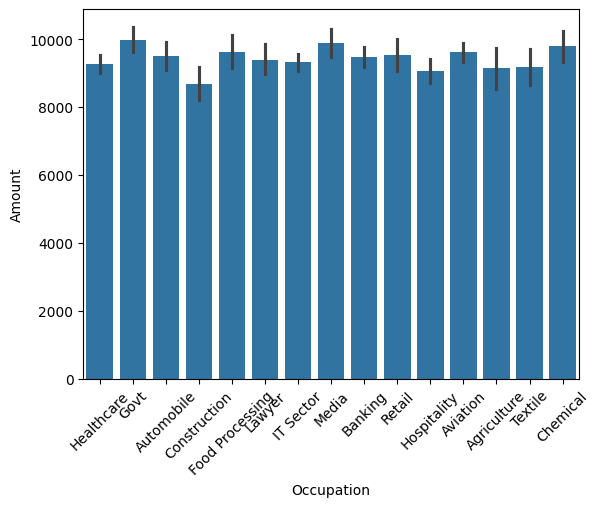

In [ ]:
sns.barplot(data=df, x='Occupation', y='Amount')
plt.xticks(rotation=45)
plt.show()

# **Occupation Trends**


Customers from IT, Healthcare, and Aviation occupations exhibited higher spending patterns, suggesting better purchasing power.

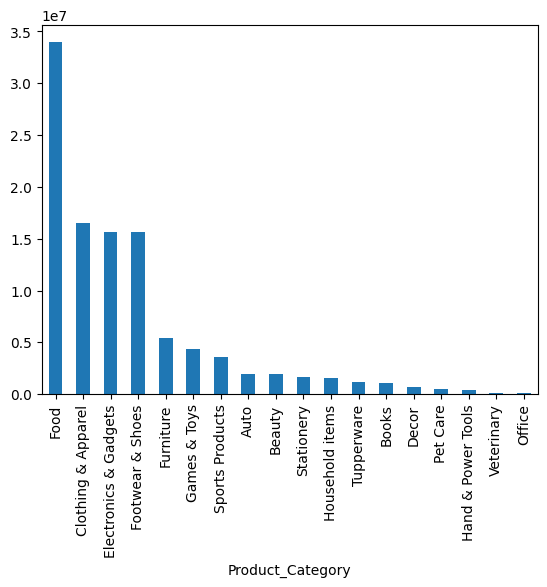

In [ ]:
df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

# **Product Category Insights**


Categories like Clothing, Electronics, and Household items had the highest purchase amounts, indicating strong festive demand in these segments.

# Conclusion

---

*The analysis shows that sales were largely driven by women, working professionals, and customers from major states such as Uttar Pradesh and Maharashtra. Popular product categories such as clothing and electronics reflect traditional festive buying patterns. These insights can help businesses improve marketing strategies, stock management, and targeted promotions during festival seasons.*